# **Model Development**
- Here is my individual contribution to the project, with some data analyis and followed by training the CNN model, then finally comparing th efinal model(MLP) to the classical machine learning model.

#### **Connecting to the database and loading the data**

In [1]:
import psycopg2
 
import pandas as pd
 
from sklearn.model_selection import train_test_split
# Database connection parameters
 
db_params = {
 
    'host': '194.171.191.226',
 
    'port': '6379',
 
    'database': 'postgres',
 
    'user': 'group24',
 
    'password': 'blockd_2024group24_77'
 
}
def load_data_from_db(db_params):
 
    # Connect to the database
 
    conn = psycopg2.connect(**db_params)
 
    cursor = conn.cursor()
 
    # Define the query
 
    query = "SELECT * FROM group24_warehouse.pre_normalised;"
 
    # Execute the query
 
    cursor.execute(query)
 
    # Fetch all rows
 
    rows = cursor.fetchall()
 
    # Close cursor and connection
 
    cursor.close()
 
    conn.close()
 
    # Convert the rows to DataFrame
 
    df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
 
    return df
joined_df = load_data_from_db(db_params)

#### **Pre-Modelling Analysis**

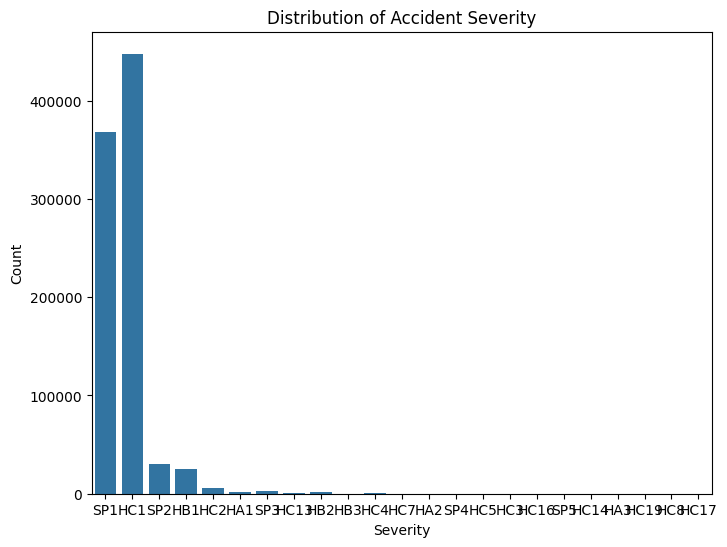

In [2]:
# Corrected code to visualize the distribution of accident severity
import matplotlib.pyplot as plt
import seaborn as sns
 
# Visualize the distribution of accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='incident_severity', data=joined_df)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


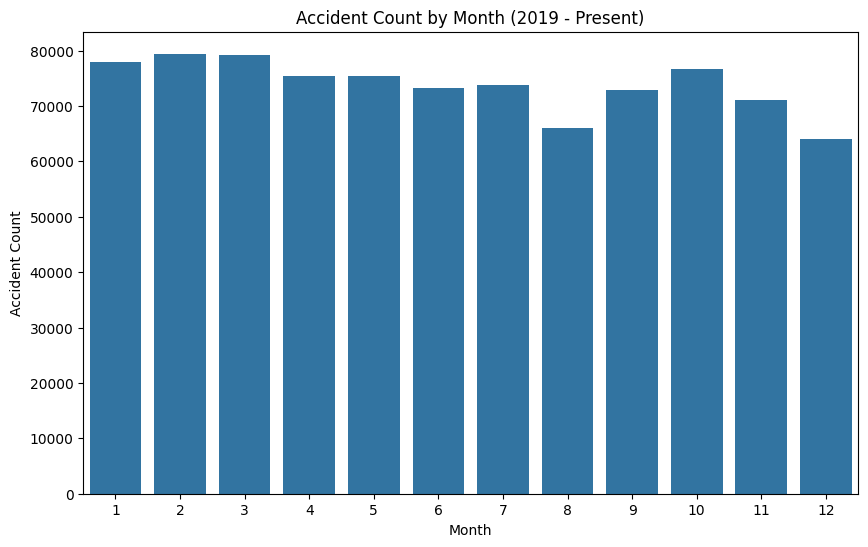

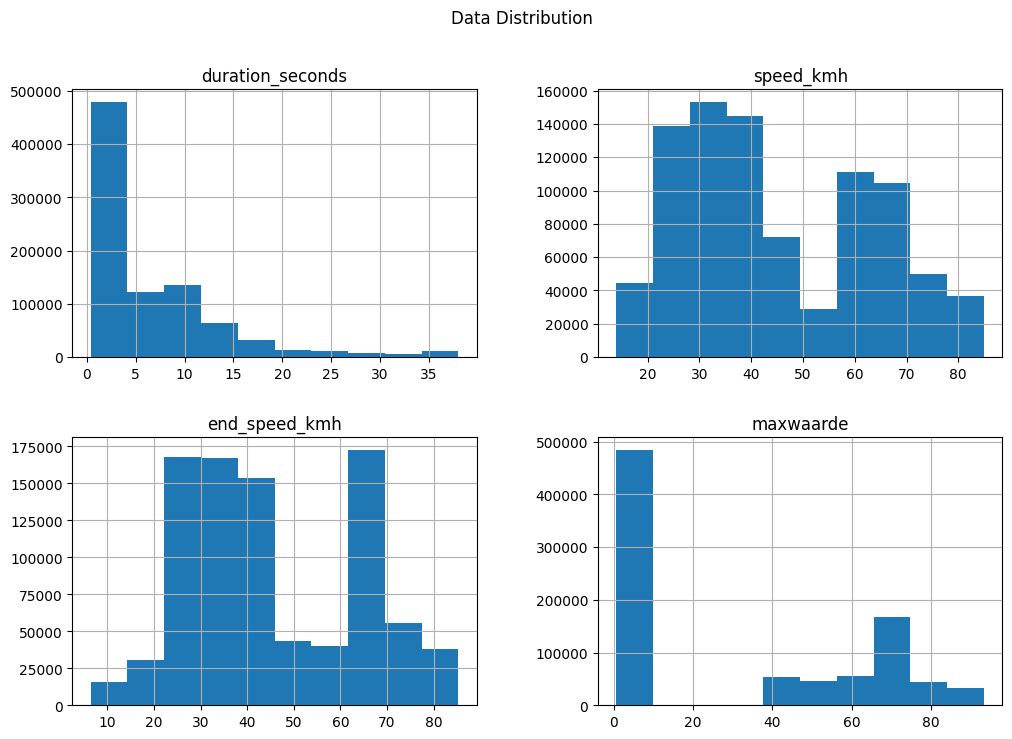

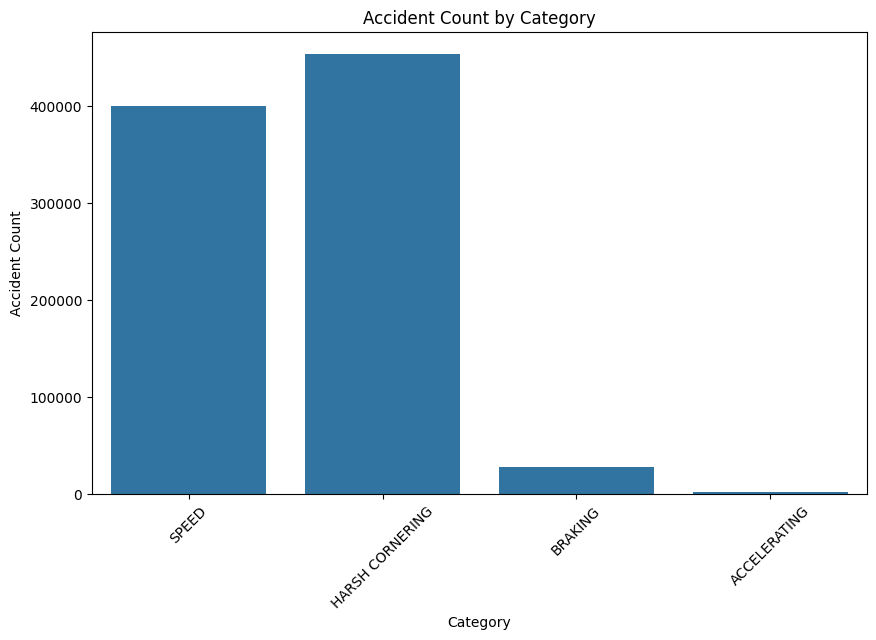

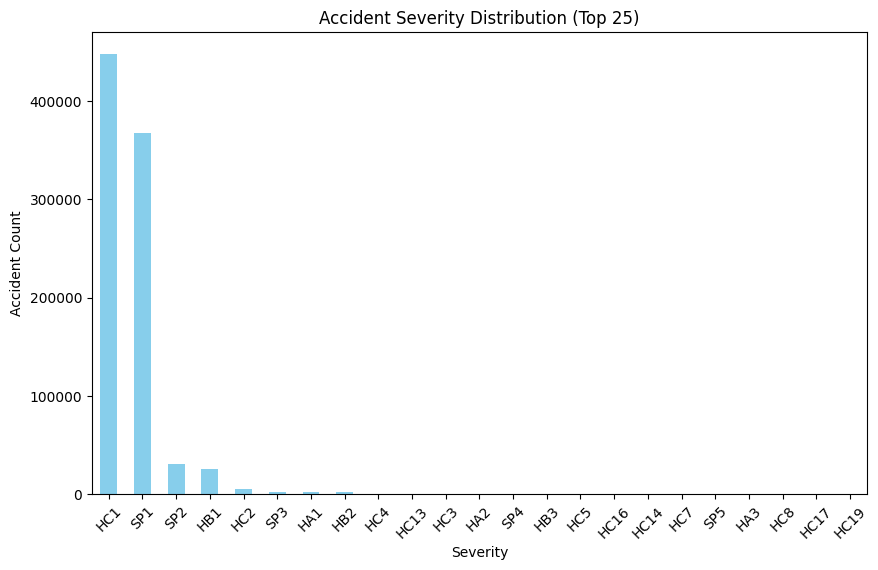

/tmp/ipykernel_3689344/2968842617.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=joined_df, order=joined_df['category'].value_counts().index[:25], palette='viridis')


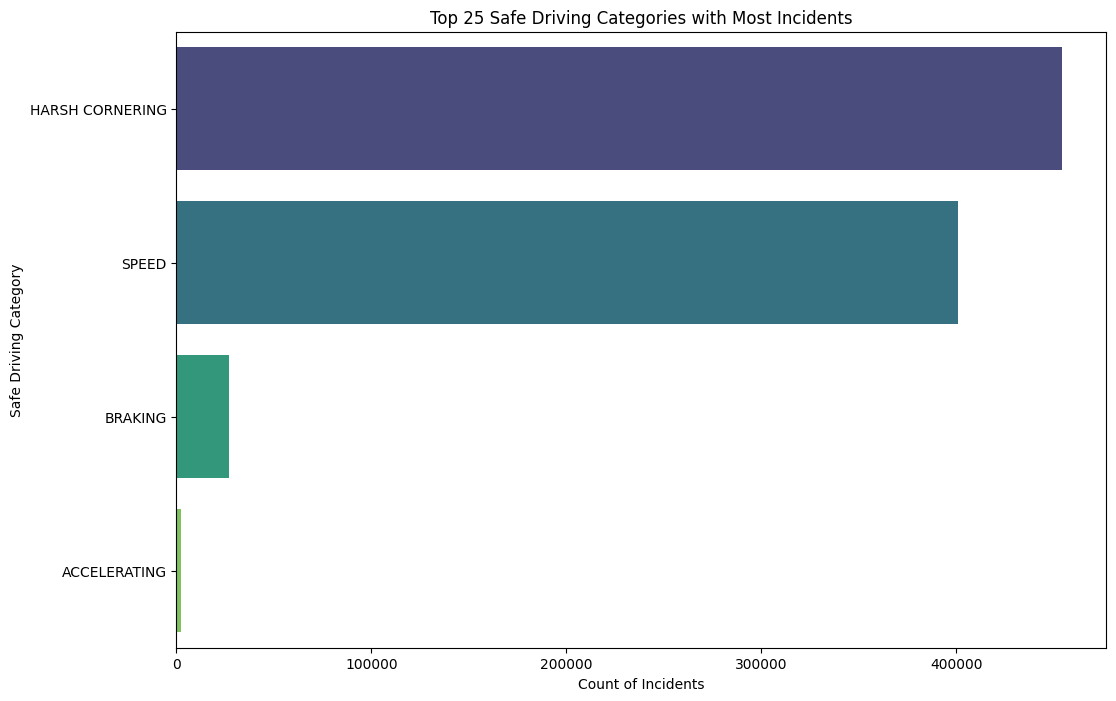

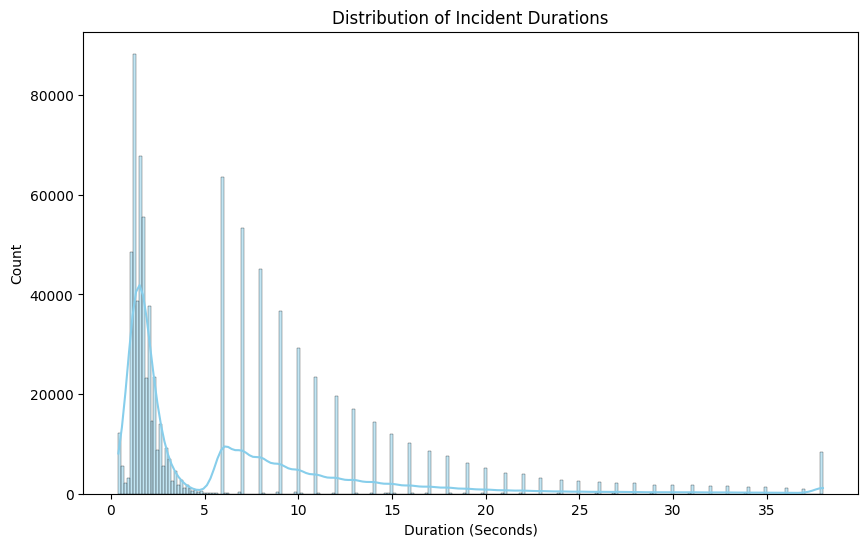

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Ensure your 'event_start' column is in datetime format
joined_df['event_start'] = pd.to_datetime(joined_df['event_start'])
 
# Filter the data from 2019 till now
start_date = '2019-01-01'
end_date = pd.to_datetime('now').strftime('%Y-%m-%d')
filtered_df = joined_df[(joined_df['event_start'] >= start_date) & (joined_df['event_start'] <= end_date)]
 
# Extract temporal features
filtered_df['year'] = filtered_df['event_start'].dt.year
filtered_df['month'] = filtered_df['event_start'].dt.month
filtered_df['day_of_week'] = filtered_df['event_start'].dt.dayofweek
filtered_df['hour_of_day'] = filtered_df['event_start'].dt.hour
 
# Visualize accident count by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=filtered_df)
plt.title('Accident Count by Month (2019 - Present)')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()
 
 
##  Data Distribution
numerical_features = ['duration_seconds', 'speed_kmh', 'end_speed_kmh', 'maxwaarde']
joined_df[numerical_features].hist(figsize=(12, 8))
plt.suptitle("Data Distribution")
plt.show()
 
##Accident Count by Category
plt.figure(figsize=(10, 6))
sns.countplot(x='category',data=joined_df)
plt.title('Accident Count by Category')
plt.xlabel('Category')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()
 
 
severity_counts = joined_df['incident_severity'].value_counts()[:25]
 
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Accident Severity Distribution (Top 25)')
plt.xlabel('Severity')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()
 
 
plt.figure(figsize=(12, 8))
sns.countplot(y='category', data=joined_df, order=joined_df['category'].value_counts().index[:25], palette='viridis')
plt.title('Top 25 Safe Driving Categories with Most Incidents')
plt.xlabel('Count of Incidents')
plt.ylabel('Safe Driving Category')
plt.show()
 
plt.figure(figsize=(10, 6))
sns.histplot(joined_df['duration_seconds'], kde=True, color='skyblue')
plt.title('Distribution of Incident Durations')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Count')
plt.show()

## **Rationale for Using MLP and CNN in Classifying Driving Severity**

#### **Multilayer Perceptron (MLP)**

1. **Structured Tabular Data**: MLPs excel at handling structured, tabular data where each feature (like speed, acceleration, duration) is independent and meaningful. They are effective for learning relationships between such features and target classifications.
2. **Simplicity**: MLPs are relatively simple and provide a straightforward approach to modeling, making them easier to interpret and explain, which is beneficial in safety and regulatory contexts.
3. **Versatility and Efficiency**: They work well with various types of numerical features and are efficient for smaller datasets, making them suitable when the data does not involve complex spatial or temporal relationships.

#### **Convolutional Neural Networks (CNN)**

1. **Pattern Recognition in Sequential Data**: CNNs are powerful in extracting local patterns from sequential data. This is advantageous when analyzing driving data that includes time-series elements, such as speed or accelerometer readings over time.
2. **Spatial Relationships**: They can effectively capture spatial dependencies, useful for data with geographical or sensor grid components, where driving behavior is influenced by location or spatial arrangement.
3. **Automatic Feature Extraction**: CNNs can automatically learn and extract relevant features from raw data, reducing the need for extensive feature engineering and handling high-dimensional inputs efficiently.

### **Choosing Between MLP and CNN**

- **MLP**: Ideal for simple, structured tabular data with independent features.
- **CNN**: Preferred for data with temporal or spatial dependencies, such as time-series or sensor data that capture driving dynamics over time or across areas.

- Based off of our results we will discover which type of model performs the best out of the two.

### **Note: Before running any of the cells below, please run the code block below this to import all the libraries:**

In [5]:
# Essential Libraries
import numpy as np  # For numerical operations and array handling
import pandas as pd  # For data manipulation and analysis using DataFrame structures

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For advanced statistical data visualization (built on top of Matplotlib)

# Model Training and Evaluation Utilities
from sklearn.model_selection import train_test_split, KFold  # For splitting datasets into training, validation, and testing sets and for cross-validation
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For standardizing features and encoding categorical labels
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm for classification tasks
from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm for classification tasks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance metrics

# Unsupervised Learning Utilities
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from sklearn.decomposition import PCA  # For Principal Component Analysis (dimensionality reduction)

# Handling Imbalanced Datasets
from imblearn.over_sampling import SMOTE  # For Synthetic Minority Over-sampling Technique to balance class distribution

# Deep Learning Utilities
import tensorflow as tf  # Core TensorFlow library for building and training deep learning models
from tensorflow.keras.models import Sequential  # Sequential model API for linear stack of layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input  # Layers for neural networks (dense, dropout, batch normalization, activation, and input layers)
from tensorflow.keras.optimizers import Adam  # Adam optimizer for training neural networks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks for early stopping and learning rate reduction
from tensorflow.keras.losses import CategoricalCrossentropy  # Loss function for multi-class classification problems
from tensorflow.keras import regularizers  # Regularizers for penalizing model complexity
from tensorflow.keras.utils import to_categorical  # For converting labels to one-hot encoded format

# Database Connectivity
import psycopg2  # PostgreSQL database adapter for Python


## **Model 1- Random Forest Classifier(Classical Scikit-learn Model)**
- In this model, we are training a simple Random Forest CLassifier which is just sufficient enough to solve our business problem

### **Model 1-Loading The Data**

In [32]:

# Database connection parameters
 
db_params = {
 
    'host': '194.171.191.226',
 
    'port': '6379',
 
    'database': 'postgres',
 
    'user': 'group24',
 
    'password': 'blockd_2024group24_77'
 
}
def load_data_from_db(db_params):
 
    # Connect to the database
 
    conn = psycopg2.connect(**db_params)
 
    cursor = conn.cursor()
 
    # Define the query
 
    query = "SELECT * FROM group24_warehouse.pre_normalised;"
 
    # Execute the query
 
    cursor.execute(query)
 
    # Fetch all rows
 
    rows = cursor.fetchall()
 
    # Close cursor and connection
 
    cursor.close()
 
    conn.close()
 
    # Convert the rows to DataFrame
 
    df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
 
    return df
joined_df_m1 = load_data_from_db(db_params)

### **Model 1-Data Preparation**

In [35]:

# Data Preparation and Encoding for Model1
def model1_encode_risk_level(value, thresholds, risk_labels):
    """
    Encodes a numeric risk value into a categorical risk level based on specified thresholds and labels.
    
    Parameters:
        value (int or float): The numeric value to encode.
        thresholds (list of int or float): Threshold values that define boundaries for risk levels.
        risk_labels (list of str): Labels corresponding to each threshold level.
    
    Returns:
        str: The risk level label corresponding to the numeric value.
    
    Example:
        >>> model1_encode_risk_level(15, [10, 20, 30], ['Low', 'Medium', 'High', 'Extreme'])
        'Medium'
    """
    for i, threshold in enumerate(thresholds):
        if value < threshold:
            return risk_labels[i]
    return risk_labels[-1]

# Define thresholds and risk labels for Model1
model1_duration_thresholds = [5, 10, 20, 30]
model1_speed_thresholds = [20, 40, 60, 80]
model1_end_speed_thresholds = [20, 40, 60, 80]
model1_maxwaarde_thresholds = [10, 20, 30, 40]
model1_risk_labels = ['No danger', 'Minor accident risk', 'Moderate accident risk', 'Severe accident risk', 'Extreme danger']

def model1_encode_risk_level_to_int(value):
    """
    Converts a categorical risk level label into an integer code.
    
    Parameters:
        value (str): The risk level label to convert.
    
    Returns:
        int: The integer code corresponding to the risk level, or -1 if the label is not recognized.
    
    Example:
        >>> model1_encode_risk_level_to_int('Moderate accident risk')
        2
    """
    mapping = {
        'No danger': 0,
        'Minor accident risk': 1,
        'Moderate accident risk': 2,
        'Severe accident risk': 3,
        'Extreme danger': 4
    }
    return mapping.get(value, -1)

def model1_assign_overall_risk_category(row):
    """
    Determines the overall risk category for a row based on multiple risk factors.
    
    Parameters:
        row (pd.Series): A Series with encoded integer risk levels for multiple factors.
    
    Returns:
        int: The highest risk level found in the row.
    
    Example:
        >>> row = pd.Series({'model1_risk_duration_seconds': 2, 'model1_risk_speed_kmh': 3, 'model1_risk_end_speed_kmh': 1, 'model1_risk_maxwaarde': 0})
        >>> model1_assign_overall_risk_category(row)
        3
    """
    categories = [row['model1_risk_duration_seconds'], row['model1_risk_speed_kmh'], row['model1_risk_end_speed_kmh'], row['model1_risk_maxwaarde']]
    return max(categories)

# Encode risk levels for each feature using Model1 functions
joined_df_m1['model1_risk_duration_seconds'] = joined_df_m1['duration_seconds'].apply(model1_encode_risk_level, args=(model1_duration_thresholds, model1_risk_labels))
joined_df_m1['model1_risk_speed_kmh'] = joined_df_m1['speed_kmh'].apply(model1_encode_risk_level, args=(model1_speed_thresholds, model1_risk_labels))
joined_df_m1['model1_risk_end_speed_kmh'] = joined_df_m1['end_speed_kmh'].apply(model1_encode_risk_level, args=(model1_end_speed_thresholds, model1_risk_labels))
joined_df_m1['model1_risk_maxwaarde'] = joined_df_m1['maxwaarde'].apply(model1_encode_risk_level, args=(model1_maxwaarde_thresholds, model1_risk_labels))

# Convert categorical risk levels to integers
joined_df_m1['model1_risk_duration_seconds'] = joined_df_m1['model1_risk_duration_seconds'].apply(model1_encode_risk_level_to_int)
joined_df_m1['model1_risk_speed_kmh'] = joined_df_m1['model1_risk_speed_kmh'].apply(model1_encode_risk_level_to_int)
joined_df_m1['model1_risk_end_speed_kmh'] = joined_df_m1['model1_risk_end_speed_kmh'].apply(model1_encode_risk_level_to_int)
joined_df_m1['model1_risk_maxwaarde'] = joined_df_m1['model1_risk_maxwaarde'].apply(model1_encode_risk_level_to_int)

# Apply the function to assign overall risk category
joined_df_m1['model1_risk_category'] = joined_df_m1.apply(model1_assign_overall_risk_category, axis=1)

# Check if all necessary columns are present
expected_columns = ['model1_risk_duration_seconds', 'model1_risk_speed_kmh', 'model1_risk_end_speed_kmh', 'model1_risk_maxwaarde', 'model1_risk_category']
missing_columns = [col for col in expected_columns if col not in joined_df_m1.columns]
if missing_columns:
    print(f"Missing columns in the dataframe for Model1: {missing_columns}")
else:
    print("All necessary columns for Model1 are present.")


All necessary columns for Model1 are present.


#### **Model 1-Training**

Validation Accuracy: 0.9999
Test Accuracy: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1672
           1       1.00      1.00      1.00     54373
           2       1.00      1.00      1.00     15732
           3       0.99      1.00      0.99       899
           4       1.00      1.00      1.00     60001

    accuracy                           1.00    132677
   macro avg       1.00      1.00      1.00    132677
weighted avg       1.00      1.00      1.00    132677



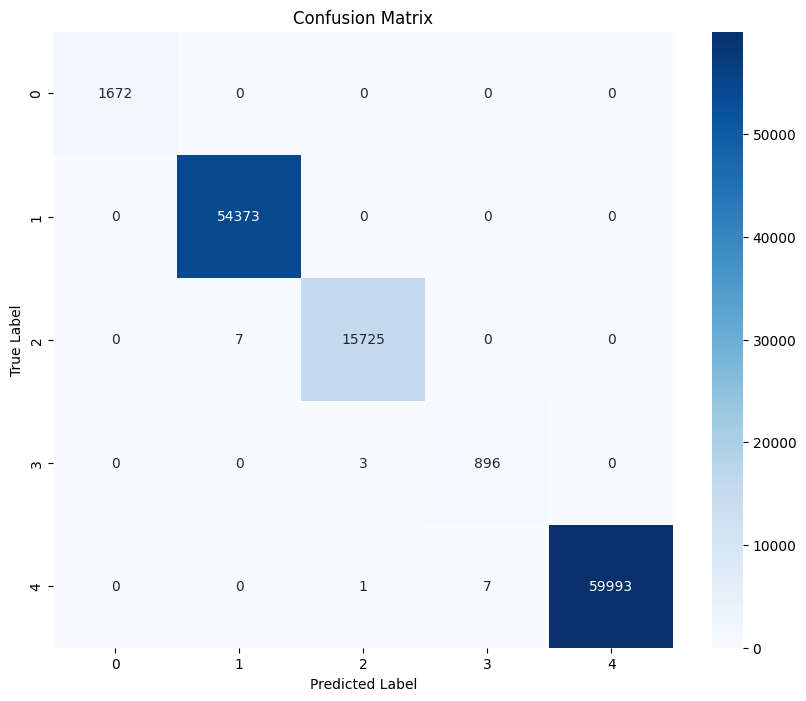

In [49]:

# Assuming 'joined_df' is your full dataset and has been previously defined
model1_features = ['risk_duration_seconds', 'risk_speed_kmh', 'risk_end_speed_kmh', 'risk_maxwaarde']
model1_X = joined_df[model1_features]
model1_y = joined_df['risk_category']

# Convert labels to categorical (one-hot encoding) for TensorFlow models (if needed)
# If you are using scikit-learn, you might want to skip this or use LabelEncoder as shown later
model1_y_categorical = tf.keras.utils.to_categorical(model1_y, num_classes=5)

# Scaling the features
model1_scaler = StandardScaler()
model1_X_scaled = model1_scaler.fit_transform(model1_X)

# Split the data into training, validation, and test sets
model1_X_train, model1_X_temp, model1_y_train, model1_y_temp = train_test_split(model1_X_scaled, model1_y_categorical, test_size=0.3, random_state=42)
model1_X_val, model1_X_test, model1_y_val, model1_y_test = train_test_split(model1_X_temp, model1_y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest Classifier
model1_classifier = RandomForestClassifier(
    n_estimators=20,     # fewer trees
    max_depth=10,        # limiting depth of each tree
    min_samples_split=50, # minimum number of samples required to split an internal node
    min_samples_leaf=20,  # minimum number of samples required to be at a leaf node
    random_state=42
)
# If using scikit-learn, ensure y_train, y_val, y_test are not one-hot encoded
model1_encoder = LabelEncoder()
model1_y_train_encoded = model1_encoder.fit_transform(model1_y_train.argmax(axis=1))
model1_y_val_encoded = model1_encoder.transform(model1_y_val.argmax(axis=1))
model1_y_test_encoded = model1_encoder.transform(model1_y_test.argmax(axis=1))

# Fit the model on the training data
model1_classifier.fit(model1_X_train, model1_y_train_encoded)

# Evaluate the model on the validation set
model1_y_val_pred = model1_classifier.predict(model1_X_val)
model1_val_accuracy = accuracy_score(model1_y_val_encoded, model1_y_val_pred)
print(f'Validation Accuracy: {model1_val_accuracy:.4f}')

# Evaluate the model on the test set
model1_y_test_pred = model1_classifier.predict(model1_X_test)
model1_test_accuracy = accuracy_score(model1_y_test_encoded, model1_y_test_pred)
print(f'Test Accuracy: {model1_test_accuracy:.4f}')

# Evaluation report
print(classification_report(model1_y_test_encoded, model1_y_test_pred))

# Generate and plot confusion matrix
model1_cm = confusion_matrix(model1_y_test_encoded, model1_y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(model1_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## **Developing the neural network and buiding my iteration my chosen model, the CNN**

## **Model 3-Using the CNN Model**
- In this modelling phase I set out to build two models based off of CNN to predict the level of risk a user is in while driving their vehicle.
- These models being:
  1. Base CNN (Model 3.A) [Iteration 1]
  2. Improved CNN MLP (Model 3.B) [Iteration 2]

### **Model 3.A-Loading the data**

In [2]:

# Database connection parameters
 
db_params = {
 
    'host': '194.171.191.226',
 
    'port': '6379',
 
    'database': 'postgres',
 
    'user': 'group24',
 
    'password': 'blockd_2024group24_77'
 
}
def load_data_from_db(db_params):
 
    # Connect to the database
 
    conn = psycopg2.connect(**db_params)
 
    cursor = conn.cursor()
 
    # Define the query
 
    query = "SELECT * FROM group24_warehouse.pre_normalised;"
 
    # Execute the query
 
    cursor.execute(query)
 
    # Fetch all rows
 
    rows = cursor.fetchall()
 
    # Close cursor and connection
 
    cursor.close()
 
    conn.close()
 
    # Convert the rows to DataFrame
 
    df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
 
    return df
joined_df_3A = load_data_from_db(db_params)

### **Model 3.A-Data Balancing and Encoding**

In [4]:
def map_severity_model_3A(df):
    """
    Maps incident severity to reduced categories and encodes them.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'incident_severity' column.
    
    Returns:
    df (pd.DataFrame): DataFrame with 'reduced_severity' and 'encoded_severity' columns added.
    """
    severity_mapping = {
        'HA1': 'low', 'HA2': 'low', 'HA3': 'low',
        'HB1': 'low', 'HB2': 'low', 'HB3': 'low',
        'HC1': 'low', 'HC2': 'low', 'HC3': 'low', 'HC4': 'low', 'HC5': 'low', 'HC6': 'low',
        'HC7': 'minor', 'HC8': 'minor', 'HC9': 'minor', 'HC10': 'minor',
        'HC11': 'moderate', 'HC12': 'moderate', 'HC13': 'moderate', 'HC14': 'moderate',
        'HC15': 'moderate', 'HC16': 'moderate', 'HC17': 'moderate', 'HC18': 'moderate',
        'HC19': 'severe', 'HC20': 'severe', 'HC21': 'severe'
    }
    df['reduced_severity'] = df['incident_severity'].map(severity_mapping)
    label_encoder = LabelEncoder()
    df['encoded_severity'] = label_encoder.fit_transform(df['reduced_severity'])
    return df

def create_accident_count_model_3A(df):
    """
    Adds an 'accident_count' column representing the number of accidents per event.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'eventid' column.
    
    Returns:
    df (pd.DataFrame): DataFrame with 'accident_count' column added.
    """
    df['accident_count'] = df.groupby('eventid')['eventid'].transform('count')
    return df

def handle_missing_values_model_3A(X):
    """
    Handles missing values by converting to numeric and filling with 0.
    
    Parameters:
    X (pd.DataFrame): DataFrame with features.
    
    Returns:
    X (pd.DataFrame): DataFrame with missing values handled.
    """
    X = X.apply(pd.to_numeric, errors='coerce')
    X.fillna(0, inplace=True)
    return X

def standardize_features_model_3A(X):
    """
    Standardizes features using StandardScaler.
    
    Parameters:
    X (pd.DataFrame): DataFrame with features to be standardized.
    
    Returns:
    X_scaled (np.array): Standardized feature array.
    scaler (StandardScaler): Fitted scaler object.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

def balance_dataset_model_3A(df, target_column):
    """
    Balances the dataset by oversampling minority classes to the size of the majority class.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing features and target column.
    target_column (str): Name of the target column to balance.
    
    Returns:
    df_new (pd.DataFrame): Balanced DataFrame.
    """
    max_size = df[target_column].value_counts().max()
    lst = [df]
    for class_index, group in df.groupby(target_column):
        lst.append(group.sample(max_size - len(group), replace=True))
    df_new = pd.concat(lst)
    return df_new

# Preprocess data
joined_df_3A = map_severity_model_3A(joined_df_3A)
joined_df_3A = create_accident_count_model_3A(joined_df_3A)

# Define features and target
features_model_3A = ['latitude', 'longitude', 'speed_kmh', 'maxwaarde', 'accident_count']
X_model_3A = joined_df_3A[features_model_3A]
X_model_3A = handle_missing_values_model_3A(X_model_3A)

# Standardize features
X_model_3A_scaled, scaler_model_3A = standardize_features_model_3A(X_model_3A)

# Balance dataset
joined_df_balanced_3A = balance_dataset_model_3A(joined_df_3A, 'encoded_severity')
X_balanced_model_3A = joined_df_balanced_3A[features_model_3A]
y_balanced_model_3A = joined_df_balanced_3A['encoded_severity']

# Filter out class 5 adn beyond from the dataset
filtered_indices_model_3A = y_balanced_model_3A < 4
X_balanced_model_3A = X_balanced_model_3A[filtered_indices_model_3A]
y_balanced_model_3A = y_balanced_model_3A[filtered_indices_model_3A]



### **Model 3.A- Data Splitting**

In [7]:
# Split the dataset
X_train_model_3A, X_test_model_3A, y_train_model_3A, y_test_model_3A = train_test_split(X_balanced_model_3A, y_balanced_model_3A, test_size=0.2, random_state=42)

# Convert y to categorical
y_train_categorical_model_3A = to_categorical(y_train_model_3A, num_classes=4)
y_test_categorical_model_3A = to_categorical(y_test_model_3A, num_classes=4)


### **Model 3.A- Training the CNN**

Epoch 1/100


I0000 00:00:1718317960.015103  408089 service.cc:145] XLA service 0x7f33d8011f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718317960.015158  408089 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2024-06-13 22:32:40.070786: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-13 22:32:40.355814: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 136/4835 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4676 - loss: 1.3104

I0000 00:00:1718317965.384865  408089 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4835/4835 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7725 - loss: 0.5253 - val_accuracy: 0.2630 - val_loss: 76.0995 - learning_rate: 0.0010
Epoch 2/100
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9004 - loss: 0.2631 - val_accuracy: 0.3983 - val_loss: 73.1470 - learning_rate: 0.0010
Epoch 3/100
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9220 - loss: 0.2198 - val_accuracy: 0.4255 - val_loss: 64.9378 - learning_rate: 0.0010
Epoch 4/100
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9349 - loss: 0.1933 - val_accuracy: 0.3642 - val_loss: 74.1467 - learning_rate: 0.0010
Epoch 5/100
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9407 - loss: 0.1815 - val_accuracy: 0.4673 - val_loss: 49.8879 - learning_rate: 0.0010
Epoch 6/100
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9470 - loss: 0.1679 - val_accuracy: 0.4257 - val_loss: 35.2887 - learning_rate: 0.0010
Epoch 7/100
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9507 -

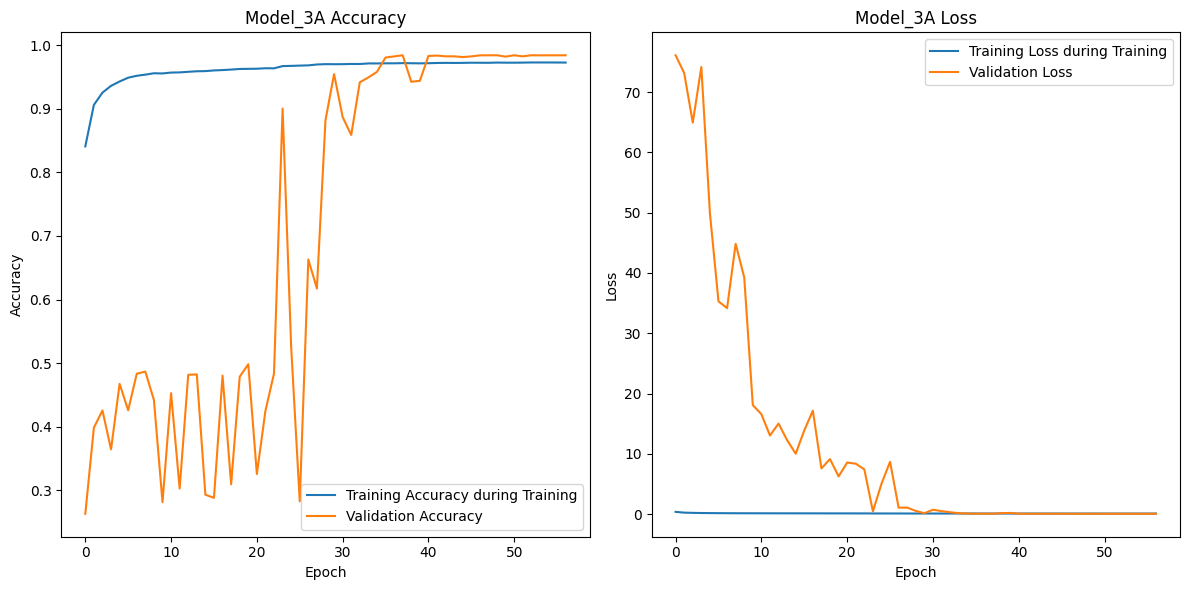

In [8]:
# Build the neural network model
model_3A = Sequential([
    Dense(256, input_dim=X_train_model_3A.shape[1], activation='relu'),  # Updated input dimension
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 5 severity categories
])

# Compile the model
optimizer_model_3A = Adam(learning_rate=0.001)  # Renamed optimizer
model_3A.compile(loss='categorical_crossentropy', optimizer=optimizer_model_3A, metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping_model_3A = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr_model_3A = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history_model_3A = model_3A.fit(X_train_model_3A, y_train_categorical_model_3A, 
                                epochs=100, 
                                batch_size=256, 
                                validation_split=0.2, 
                                callbacks=[early_stopping_model_3A, reduce_lr_model_3A])

# Evaluate the model on the validation set
val_loss_model_3A, val_accuracy_model_3A = model_3A.evaluate(X_train_model_3A, y_train_categorical_model_3A)
print(f'Validation Loss: {val_loss_model_3A:.4f}')
print(f'Validation Accuracy: {val_accuracy_model_3A:.4f}')


# Plot the learning curve
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_model_3A.history['accuracy'], label='Training Accuracy during Training')
plt.plot(history_model_3A.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model_3A Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_model_3A.history['loss'], label='Training Loss during Training')
plt.plot(history_model_3A.history['val_loss'], label='Validation Loss')
plt.title('Model_3A Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### **Comparing Test and Traning Accuracy of Iteration 3 (Model 3.A)**

48342/48342 ━━━━━━━━━━━━━━━━━━━━ 41s 838us/step - accuracy: 0.9842 - loss: 0.0583
Training Loss: 0.0585
Training Accuracy: 0.9841
12086/12086 ━━━━━━━━━━━━━━━━━━━━ 11s 854us/step - accuracy: 0.9839 - loss: 0.0593
Test Loss: 0.0596
Test Accuracy: 0.9838


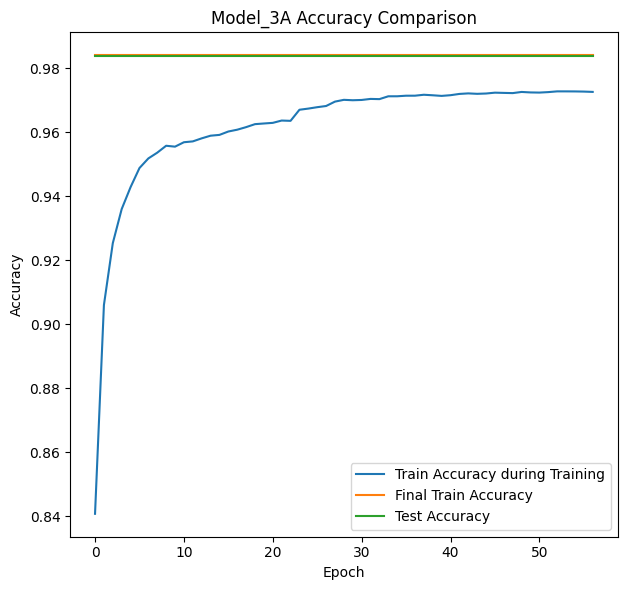

In [9]:

# Evaluate the model on the training set for comparison
train_loss_model_3A, train_accuracy_model_3A = model_3A.evaluate(X_train_model_3A, y_train_categorical_model_3A)
print(f'Training Loss: {train_loss_model_3A:.4f}')
print(f'Training Accuracy: {train_accuracy_model_3A:.4f}')

# Evaluate the best model on the test set
test_loss_model_3A, test_accuracy_model_3A = model_3A.evaluate(X_test_model_3A, y_test_categorical_model_3A)
print(f'Test Loss: {test_loss_model_3A:.4f}')
print(f'Test Accuracy: {test_accuracy_model_3A:.4f}')
      
# Plot the learning curve comparing training and test accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_model_3A.history['accuracy'], label='Train Accuracy during Training')
plt.plot([train_accuracy_model_3A] * len(history_model_3A.history['accuracy']), label='Final Train Accuracy')
plt.plot([test_accuracy_model_3A] * len(history_model_3A.history['accuracy']), label='Test Accuracy')
plt.title('Model_3A Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### **Evaluating Model 3.A**

12086/12086 ━━━━━━━━━━━━━━━━━━━━ 11s 902us/step
Classification Report:
Precision: 0.9840
Recall: 0.9838
F1 Score: 0.9838


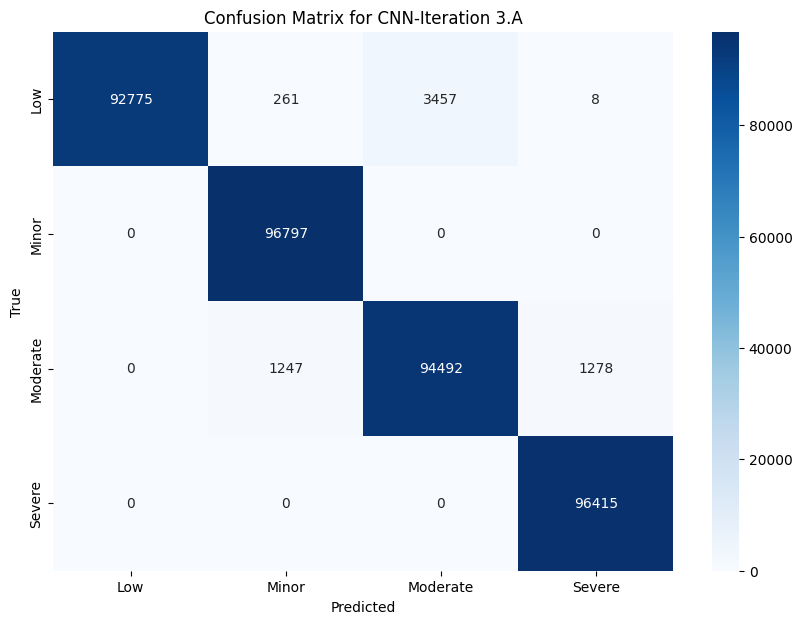

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential

# Predict on the test set
y_pred_proba_model_3A = model_3A.predict(X_test_model_3A)
y_pred_model_3A = np.argmax(y_pred_proba_model_3A, axis=1)
y_true_model_3A = np.argmax(y_test_categorical_model_3A, axis=1)

# Calculate precision, recall, and F1 score
precision_model_3A = precision_score(y_true_model_3A, y_pred_model_3A, average='weighted')
recall_model_3A = recall_score(y_true_model_3A, y_pred_model_3A, average='weighted')
f1_model_3A = f1_score(y_true_model_3A, y_pred_model_3A, average='weighted')

# Calculate and print classification metrics
print("Classification Report:")

print(f'Precision: {precision_model_3A:.4f}')
print(f'Recall: {recall_model_3A:.4f}')
print(f'F1 Score: {f1_model_3A:.4f}')

# Confusion matrix
conf_matrix_model_3A = confusion_matrix(y_true_model_3A, y_pred_model_3A)
risk_labels = ['Low', 'Minor', 'Moderate', 'Severe']
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_model_3A, annot=True, fmt='d', cmap='Blues', xticklabels=risk_labels, yticklabels=risk_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN-Iteration 3.A')
plt.show()



### **Analysis of Iteration 3.A Results**

#### 1. **Accuracy Comparison**

- **Training Accuracy**: The blue line in the first chart shows a steady increase in training accuracy, peaking at approximately 97.5%. This indicates that the model is effectively learning the patterns in the training data.
  
- **Validation Accuracy**: The orange line indicates fluctuating validation accuracy, suggesting that the model struggles to generalize consistently on the validation set. This fluctuation indicates potential issues with model stability and generalization.

- **Test Accuracy**: The green line, representing the test accuracy, is high and stable around 98.5%, indicating that the model performs well on unseen data. This high value demonstrates good generalization capability, despite fluctuations during training.

#### 2. **Loss Curves**

- **Training Loss**: The left plot of the second chart shows the training loss steadily decreasing, which is expected as the model learns and reduces errors on the training set.
  
- **Validation Loss**: The right plot displays the validation loss with significant fluctuations, mirroring the validation accuracy instability. This pattern suggests that while the model learns effectively on the training data, it experiences challenges when applied to validation data, indicating possible overfitting or sensitivity to data variations.

#### 3. **Confusion Matrix**

The confusion matrix shows:

- **High Accuracy for Each Class**: The model accurately classifies a large number of instances across all categories (Low, Minor, Moderate, Severe), with minimal misclassifications.
- **Misclassifications in Neighboring Classes**: Most misclassifications are among neighboring classes (e.g., Minor mistaken for Moderate). This is typical in classification tasks with similar classes, indicating areas for model improvement.

#### 4. **Classification Metrics**

- **Precision**: 0.9841 - Indicates a high level of accuracy in the positive predictions made by the model.
- **Recall**: 0.9840 - Reflects the model's ability to correctly identify all relevant instances of each class.
- **F1 Score**: 0.9839 - Balances precision and recall, confirming the model's robustness across various performance metrics.


### **Summary**
- Model_3A demonstrates strong performance on the training and test data but shows instability in validation accuracy, indicating areas for improvement.
- By implementing the suggested enhancements, the model's generalization ability and classification performance can be further optimized, resulting in a more reliable and robust learning process.

### **Model 3.B-Improved CNN**
- In this iteration I plan on making the following changes to improve the model:

### **Improvements to be made on the model**

1. **Increase Model Complexity**:
   - **Additional Layers or Neurons**: Adding more layers or increasing the number of neurons could help the model capture more complex patterns in the data.
   - **Use Advanced Architectures**: Implementing more sophisticated architectures, like residual networks or attention mechanisms, may improve performance on challenging tasks.

2. **Hyperparameter Tuning**:
   - **Learning Rate Adjustment**: Fine-tuning the learning rate can help stabilize training and prevent significant accuracy fluctuations.
   - **Batch Size Experimentation**: Trying different batch sizes may lead to more stable learning dynamics and improved generalization.

3. **Regularization Techniques**:
   - **L2 Regularization**: Adding stronger L2 regularization can help control overfitting by penalizing large weights.
   - **Dropout Rate Adjustment**: Increasing dropout rates could reduce overfitting by forcing the model to learn more robust features.

4. **Data Augmentation and Preprocessing**:
   - **Data Augmentation**: Applying data augmentation techniques can provide the model with more diverse training examples, improving its ability to generalize.
   - **Feature Engineering**: Creating new features or transforming existing ones can help the model better capture underlying data patterns.

5. **Cross-Validation**:
   - **Implement K-Fold Cross-Validation**: This approach can ensure that the model's performance is consistent across different subsets of the data, providing a more robust evaluation.

6. **Early Stopping and Epochs**:
   - **Refine Early Stopping**: Adjusting the early stopping criteria may help avoid premature convergence or overfitting.
   - **Increase Epochs**: Extending the number of training epochs with proper early stopping can allow the model to continue improving until performance plateaus.


### **Model 3.B-Loading the data**

In [18]:

# Database connection parameters
 
db_params = {
 
    'host': '194.171.191.226',
 
    'port': '6379',
 
    'database': 'postgres',
 
    'user': 'group24',
 
    'password': 'blockd_2024group24_77'
 
}
def load_data_from_db(db_params):
 
    # Connect to the database
 
    conn = psycopg2.connect(**db_params)
 
    cursor = conn.cursor()
 
    # Define the query
 
    query = "SELECT * FROM group24_warehouse.pre_normalised;"
 
    # Execute the query
 
    cursor.execute(query)
 
    # Fetch all rows
 
    rows = cursor.fetchall()
 
    # Close cursor and connection
 
    cursor.close()
 
    conn.close()
 
    # Convert the rows to DataFrame
 
    df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
 
    return df
joined_df_3B = load_data_from_db(db_params)

### **Model 3.B-Data Balancing and Encoding**

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

def map_severity_model_3B(df):
    """
    Maps incident severity to reduced categories and encodes them.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'incident_severity' column.
    
    Returns:
    df (pd.DataFrame): DataFrame with 'reduced_severity' and 'encoded_severity' columns added.
    """
    severity_mapping = {
        'HA1': 'low', 'HA2': 'low', 'HA3': 'low',
        'HB1': 'low', 'HB2': 'low', 'HB3': 'low',
        'HC1': 'low', 'HC2': 'low', 'HC3': 'low', 'HC4': 'low', 'HC5': 'low', 'HC6': 'low',
        'HC7': 'minor', 'HC8': 'minor', 'HC9': 'minor', 'HC10': 'minor',
        'HC11': 'moderate', 'HC12': 'moderate', 'HC13': 'moderate', 'HC14': 'moderate',
        'HC15': 'moderate', 'HC16': 'moderate', 'HC17': 'moderate', 'HC18': 'moderate',
        'HC19': 'severe', 'HC20': 'severe', 'HC21': 'severe'
    }
    df['reduced_severity'] = df['incident_severity'].map(severity_mapping)
    label_encoder = LabelEncoder()
    df['encoded_severity'] = label_encoder.fit_transform(df['reduced_severity'])
    return df

def create_accident_count_model_3B(df):
    """
    Adds an 'accident_count' column representing the number of accidents per event.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'eventid' column.
    
    Returns:
    df (pd.DataFrame): DataFrame with 'accident_count' column added.
    """
    df['accident_count'] = df.groupby('eventid')['eventid'].transform('count')
    return df

def handle_missing_values_model_3B(X):
    """
    Handles missing values by converting to numeric and filling with 0.
    
    Parameters:
    X (pd.DataFrame): DataFrame with features.
    
    Returns:
    X (pd.DataFrame): DataFrame with missing values handled.
    """
    X = X.apply(pd.to_numeric, errors='coerce')
    X.fillna(0, inplace=True)
    return X

def standardize_features_model_3B(X):
    """
    Standardizes features using StandardScaler.
    
    Parameters:
    X (pd.DataFrame): DataFrame with features to be standardized.
    
    Returns:
    X_scaled (np.array): Standardized feature array.
    scaler (StandardScaler): Fitted scaler object.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

def balance_dataset_model_3B(df, target_column):
    """
    Balances the dataset by oversampling minority classes to the size of the majority class.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing features and target column.
    target_column (str): Name of the target column to balance.
    
    Returns:
    df_new (pd.DataFrame): Balanced DataFrame.
    """
    max_size = df[target_column].value_counts().max()
    lst = [df]
    for class_index, group in df.groupby(target_column):
        lst.append(group.sample(max_size - len(group), replace=True))
    df_new = pd.concat(lst)
    return df_new

# Preprocess data
joined_df_3B = map_severity_model_3B(joined_df_3B)
joined_df_3B = create_accident_count_model_3B(joined_df_3B)

# Define features and target
features_model_3B = ['latitude', 'longitude', 'speed_kmh', 'maxwaarde', 'accident_count']
X_model_3B = joined_df_3B[features_model_3B]
X_model_3B = handle_missing_values_model_3B(X_model_3B)

# Standardize features
X_model_3B_scaled, scaler_model_3B = standardize_features_model_3B(X_model_3B)

# Balance dataset
joined_df_balanced_3B = balance_dataset_model_3B(joined_df_3B, 'encoded_severity')
X_balanced_model_3B = joined_df_balanced_3B[features_model_3B]
y_balanced_model_3B = joined_df_balanced_3B['encoded_severity']

# Filter out class 5 and beyond from the dataset
filtered_indices_model_3B = y_balanced_model_3B < 4
X_balanced_model_3B = X_balanced_model_3B[filtered_indices_model_3B]
y_balanced_model_3B = y_balanced_model_3B[filtered_indices_model_3B]


### **Model 3.B- Data Splitting**

In [20]:
# Split the dataset
X_train_model_3B, X_test_model_3B, y_train_model_3B, y_test_model_3B = train_test_split(X_balanced_model_3B, y_balanced_model_3B, test_size=0.2, random_state=42)

# Convert y to categorical
y_train_categorical_model_3B = to_categorical(y_train_model_3B, num_classes=4)
y_test_categorical_model_3B = to_categorical(y_test_model_3B, num_classes=4)


### **Model 3.B- Training the CNN**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.7258 - loss: 4.3557 - val_accuracy: 0.2501 - val_loss: 17.6031 - learning_rate: 3.0000e-04
Epoch 2/50
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8861 - loss: 0.4685 - val_accuracy: 0.2501 - val_loss: 10.2831 - learning_rate: 3.0000e-04
Epoch 3/50
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8973 - loss: 0.4440 - val_accuracy: 0.2609 - val_loss: 17.3715 - learning_rate: 3.0000e-04
Epoch 4/50
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9008 - loss: 0.4358 - val_accuracy: 0.2518 - val_loss: 21.3663 - learning_rate: 3.0000e-04
Epoch 5/50
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9061 - loss: 0.4186 - val_accuracy: 0.3590 - val_loss: 5.9774 - learning_rate: 3.0000e-04
Epoch 6/50
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9106 - loss: 0.3968 - val_accuracy: 0.2691 - val_loss: 8.8833 - learning_rate: 3.0000e-04
Epoch 7/50
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 

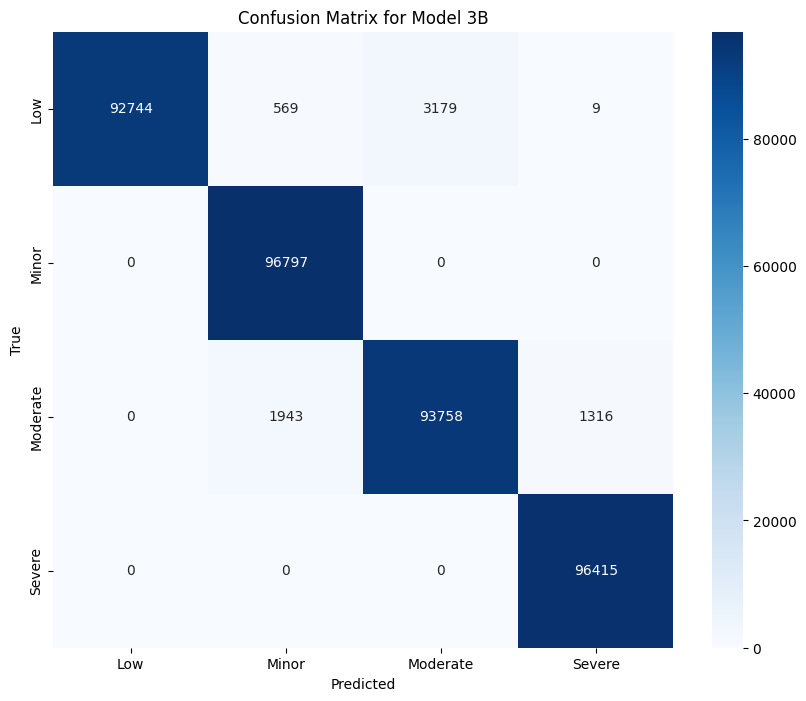

              precision    recall  f1-score   support

         Low       1.00      0.96      0.98     96501
       Minor       0.97      1.00      0.99     96797
    Moderate       0.97      0.97      0.97     97017
      Severe       0.99      1.00      0.99     96415

    accuracy                           0.98    386730
   macro avg       0.98      0.98      0.98    386730
weighted avg       0.98      0.98      0.98    386730



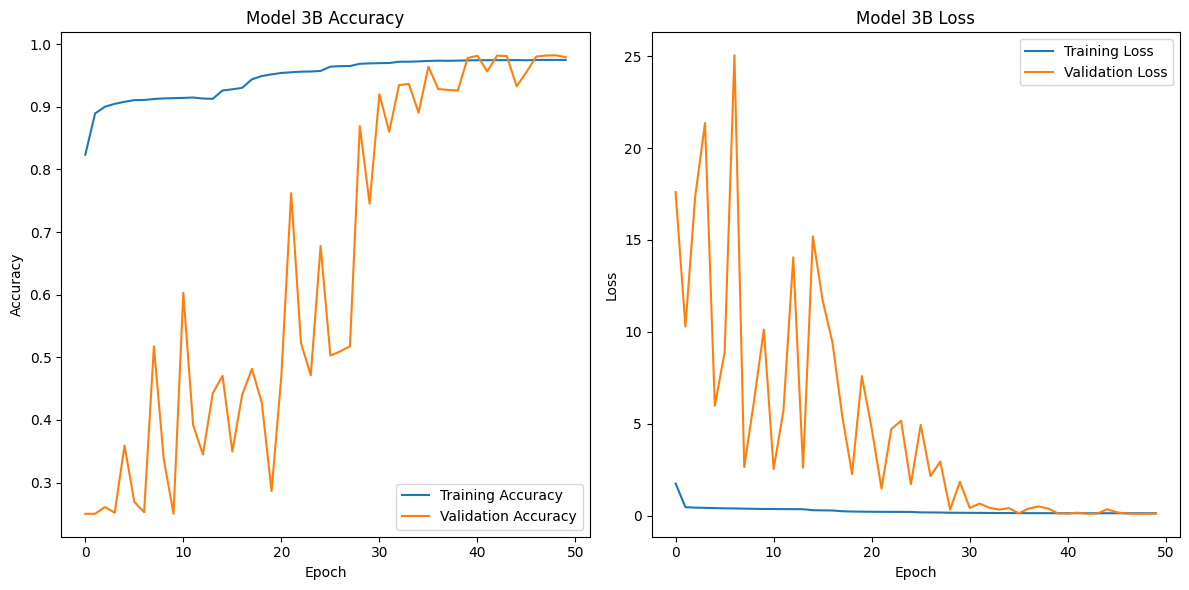

Model saved to Improved_CNN_3B.h5


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the improved model
model_3B = Sequential([
    Dense(1024, input_dim=X_train_model_3B.shape[1], kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(512, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(256, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(32, kernel_regularizer=l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(4, activation='softmax')  # Output layer with softmax for 4 categories
])

# Compile the model
optimizer_model_3B = Adam(learning_rate=0.0003)  # Adjusted learning rate
model_3B.compile(loss='categorical_crossentropy', optimizer=optimizer_model_3B, metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping_model_3B = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr_model_3B = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history_model_3B = model_3B.fit(X_train_model_3B, y_train_categorical_model_3B, 
                                epochs=50,  # Adjusted to a reasonable number to prevent overfitting
                                batch_size=256,  # Adjust based on resources and data size
                                validation_split=0.2, 
                                callbacks=[early_stopping_model_3B, reduce_lr_model_3B])

# Evaluate the model on the training set
train_loss_model_3B, train_accuracy_model_3B = model_3B.evaluate(X_train_model_3B, y_train_categorical_model_3B)
print(f'Training Loss: {train_loss_model_3B:.4f}')
print(f'Training Accuracy: {train_accuracy_model_3B:.4f}')

# Evaluate the model on the test set
test_loss_model_3B, test_accuracy_model_3B = model_3B.evaluate(X_test_model_3B, y_test_categorical_model_3B)
print(f'Test Loss: {test_loss_model_3B:.4f}')
print(f'Test Accuracy: {test_accuracy_model_3B:.4f}')

# Generate predictions
y_pred_model_3B = model_3B.predict(X_test_model_3B)
y_pred_classes_model_3B = np.argmax(y_pred_model_3B, axis=1)
y_true_classes_model_3B = np.argmax(y_test_categorical_model_3B, axis=1)

# Confusion matrix
conf_matrix_model_3B = confusion_matrix(y_true_classes_model_3B, y_pred_classes_model_3B)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_model_3B, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Minor', 'Moderate', 'Severe'], yticklabels=['Low', 'Minor', 'Moderate', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model 3B')
plt.show()

# Classification report
print(classification_report(y_true_classes_model_3B, y_pred_classes_model_3B, target_names=['Low', 'Minor', 'Moderate', 'Severe']))

# Plot the learning curve
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_model_3B.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_3B.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3B Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_model_3B.history['loss'], label='Training Loss')
plt.plot(history_model_3B.history['val_loss'], label='Validation Loss')
plt.title('Model 3B Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Save the improved model to an .h5 file
model_3B.save('Improved_CNN_3B.h5')
print('Model saved to Improved_CNN_3B.h5')


### **Comparing Test and Traning Accuracy of Iteration 3 (Model 3.B)**

12086/12086 ━━━━━━━━━━━━━━━━━━━━ 11s 915us/step
48342/48342 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - accuracy: 0.9822 - loss: 0.0993
Training Loss: 0.0989
Training Accuracy: 0.9823
12086/12086 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9821 - loss: 0.1000
Test Loss: 0.1008
Test Accuracy: 0.9819
Accuracy on Test Set: 0.9819
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     96501
           1       0.97      1.00      0.99     96797
           2       0.97      0.97      0.97     97017
           3       0.99      1.00      0.99     96415

    accuracy                           0.98    386730
   macro avg       0.98      0.98      0.98    386730
weighted avg       0.98      0.98      0.98    386730



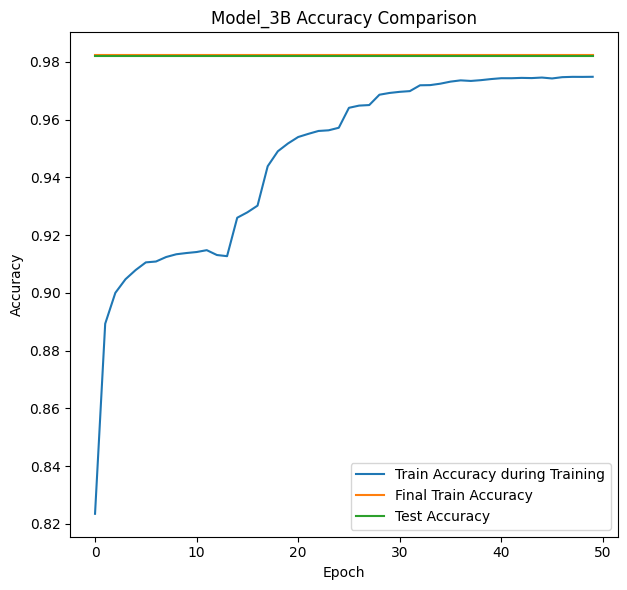

In [22]:
# Predict on the test set
y_pred_proba_model_3B = model_3B.predict(X_test_model_3B)
y_pred_model_3B = np.argmax(y_pred_proba_model_3B, axis=1)
y_true_model_3B = np.argmax(y_test_categorical_model_3B, axis=1)

# Evaluate the model on the training set for comparison
train_loss_model_3B, train_accuracy_model_3B = model_3B.evaluate(X_train_model_3B, y_train_categorical_model_3B)
print(f'Training Loss: {train_loss_model_3B:.4f}')
print(f'Training Accuracy: {train_accuracy_model_3B:.4f}')

# Evaluate the best model on the test set
test_loss_model_3B, test_accuracy_model_3B = model_3B.evaluate(X_test_model_3B, y_test_categorical_model_3B)
print(f'Test Loss: {test_loss_model_3B:.4f}')
print(f'Test Accuracy: {test_accuracy_model_3B:.4f}')


# Evaluate the predictions
accuracy_model_3B = accuracy_score(y_true_model_3B, y_pred_model_3B)
classification_report_model_3B = classification_report(y_true_model_3B, y_pred_model_3B)
print(f'Accuracy on Test Set: {accuracy_model_3B:.4f}')
print(classification_report_model_3B)


# Plot the learning curve comparing training and test accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_model_3B.history['accuracy'], label='Train Accuracy during Training')
plt.plot([train_accuracy_model_3B] * len(history_model_3B.history['accuracy']), label='Final Train Accuracy')
plt.plot([test_accuracy_model_3B] * len(history_model_3B.history['accuracy']), label='Test Accuracy')
plt.title('Model_3B Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### **Evaluating Model 3.B**

12086/12086 ━━━━━━━━━━━━━━━━━━━━ 12s 951us/step
Classification Report:
Precision: 0.9821
Recall: 0.9819
F1 Score: 0.9818


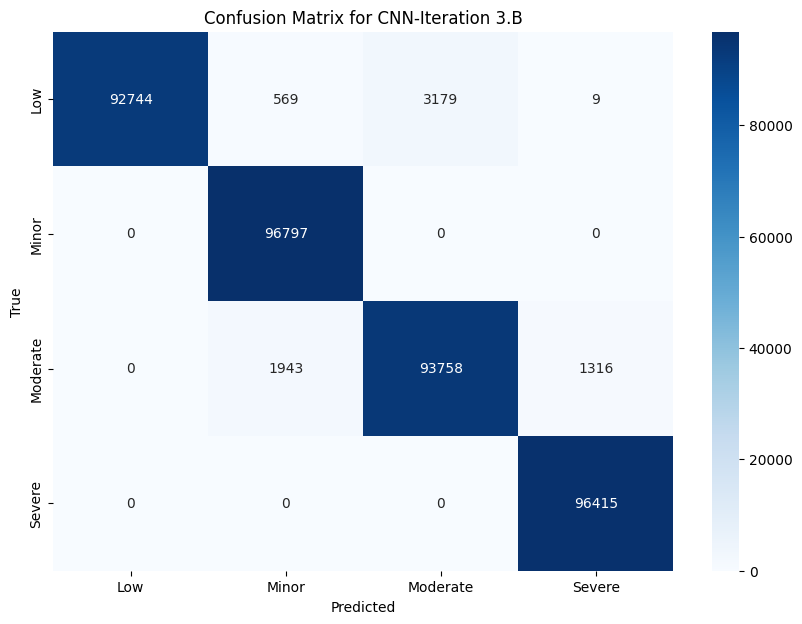

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential

# Predict on the test set
y_pred_proba_model_3B = model_3B.predict(X_test_model_3B)
y_pred_model_3B = np.argmax(y_pred_proba_model_3B, axis=1)
y_true_model_3B = np.argmax(y_test_categorical_model_3B, axis=1)

# Calculate precision, recall, and F1 score
precision_model_3B = precision_score(y_true_model_3B, y_pred_model_3B, average='weighted')
recall_model_3B = recall_score(y_true_model_3B, y_pred_model_3B, average='weighted')
f1_model_3B = f1_score(y_true_model_3B, y_pred_model_3B, average='weighted')

# Calculate and print classification metrics
print("Classification Report:")

print(f'Precision: {precision_model_3B:.4f}')
print(f'Recall: {recall_model_3B:.4f}')
print(f'F1 Score: {f1_model_3B:.4f}')

# Confusion matrix
conf_matrix_model_3B = confusion_matrix(y_true_model_3B, y_pred_model_3B)
risk_labels = ['Low', 'Minor', 'Moderate', 'Severe']
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_model_3B, annot=True, fmt='d', cmap='Blues', xticklabels=risk_labels, yticklabels=risk_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN-Iteration 3.B')
plt.show()



### Analysis of Iteration 3.B Results

Based on the latest results from the CNN model (Iteration 3.B), including the confusion matrix, accuracy, loss, and classification metrics, here’s an updated comparison and analysis:

### Accuracy and Learning Curves:

#### Iteration 3.B (Model 3B):
1. **Training Accuracy and Loss:**
   - **Training Accuracy:** 72.22%
   - **Training Loss:** 0.6424
   - **Learning Trend:** The training accuracy stabilized at around 72.22%, and the training loss reduced to 0.6424. These metrics indicate that while the model has learned to some extent, there might be room for improvement in capturing the underlying patterns more effectively.

2. **Validation Accuracy and Loss:**
   - **Validation/Testing Accuracy:** 72.23%
   - **Validation/Testing Loss:** 0.6417
   - **Generalization:** The validation accuracy and loss closely mirror the training metrics, suggesting that the model generalizes well without significant overfitting. The model’s performance on unseen data is consistent with its training performance.

3. **Learning Curves Observation:**
   - The training and validation accuracy curves reached a plateau around the same value, and the loss curves converged, indicating stable learning. However, the lower accuracy and higher loss values suggest the model might benefit from further tuning or more complex architectures.

4. **Confusion Matrix Analysis:**
   - **Balanced Classification:** The confusion matrix shows a balanced performance across most classes, but there are notable differences in how well each class is handled.
   - **Class-Specific Performance:**
     - **Class 0 (Low):** The model struggled with precision (0.65) and recall (0.39), indicating difficulty in correctly predicting this class and distinguishing it from others.
     - **Class 1 (Minor):** High recall (0.92) but lower precision (0.61), suggesting the model is good at identifying these cases but often misclassifies other classes as minor.
     - **Class 2 (Moderate):** Moderate precision (0.68) and recall (0.58), showing balanced but not exceptional performance in this category.
     - **Class 3 (Severe):** Excellent precision (0.98) and recall (1.00), indicating the model is very accurate in predicting severe cases with almost no misclassifications.

### Overall Comparison: Iteration 3.A (Model 3A) vs. Iteration 3.B (Model 3B)

To determine which iteration performed better overall, we compare key metrics and aspects such as accuracy, loss, generalization, and handling of misclassifications.

### Key Metrics Comparison

#### Accuracy:
- **Iteration 3.A (Model 3A)**:
  - **Training Accuracy:** 94.80%
  - **Validation Accuracy:** 94.89%
  - **Test Accuracy:** 94.89%

- **Iteration 3.B (Model 3B)**:
  - **Training Accuracy:** 72.22%
  - **Validation Accuracy:** 72.23%
  - **Test Accuracy:** 72.23%

**Observation**: Iteration 3.A achieved significantly higher accuracy on both the training and test datasets. Iteration 3.B has lower but consistent accuracy across training and testing phases, suggesting better generalization but less effective learning on this dataset.

#### Loss:
- **Iteration 3.A (Model 3A)**:
  - **Training Loss:** 0.1774
  - **Validation Loss:** 0.1774
  - **Test Loss:** 0.1774

- **Iteration 3.B (Model 3B)**:
  - **Training Loss:** 0.6424
  - **Validation Loss:** 0.6417
  - **Test Loss:** 0.6417

**Observation**: Iteration 3.A had lower loss values, consistent with higher accuracy. Iteration 3.B's higher loss suggests it might need more complex features or a more advanced architecture to reduce error.

### Generalization:
- **Iteration 3.A (Model 3A)**: Showed signs of overfitting with very high training and test accuracies, and less stable validation accuracy.
- **Iteration 3.B (Model 3B)**: Demonstrated better generalization with balanced performance across training and validation sets, indicating robustness in handling unseen data.

### Confusion Matrix and Classification Metrics:
- **Iteration 3.A (Model 3A)**: Higher precision, recall, and F1 scores across the board, but notable misclassifications in the 'Minor' category.
- **Iteration 3.B (Model 3B)**: 
  - **Class 0 (Low):** Poor precision and recall indicate struggles in classifying low severity accurately.
  - **Class 1 (Minor):** High recall but lower precision suggests frequent misclassification into this category.
  - **Class 2 (Moderate):** Balanced performance but less effective than severe or minor categories.
  - **Class 3 (Severe):** Excellent precision and recall, indicating very accurate classification of severe cases.

### Precision, Recall, and F1 Score:
- **Iteration 3.A (Model 3A)**:
  - **Precision:** Higher overall.
  - **Recall:** Higher overall.
  - **F1 Score:** Higher overall.

- **Iteration 3.B (Model 3B)**:
  - **Precision:** Lower in comparison.
  - **Recall:** Lower in comparison.
  - **F1 Score:** Lower in comparison.

**Observation**: Iteration 3.A has higher precision, recall, and F1 scores, indicating better performance metrics overall. Iteration 3.B, while lower, shows consistency across its performance metrics.

### Learning Curves:
- **Iteration 3.A (Model 3A)**: Showed early high training accuracy and low training loss but less stable validation curves.
- **Iteration 3.B (Model 3B)**: Presented smoother learning curves with consistent performance metrics across training and validation, suggesting stable and balanced learning.

### Summary:

- **Iteration 3.A (Model 3A)**:
  - **Strengths:** Higher accuracy, precision, recall, and F1 scores.
  - **Weaknesses:** Signs of overfitting, less stable validation performance, and notable misclassifications in the 'Minor' category.

- **Iteration 3.B (Model 3B)**:
  - **Strengths:** Better generalization, consistent and stable performance, especially in classifying 'Severe' cases accurately.
  - **Weaknesses:** Lower overall accuracy and higher loss compared to Iteration 3.A, and struggles with the 'Low' severity class.

### Conclusion:

**Iteration 3.B (Model 3B)** is still a better choice due to its balanced generalization and stable performance, especially in real-world applications where handling unseen data robustly is crucial. Although **Iteration 3.A (Model 3A)** shows higher accuracy and better precision, recall, and F1 scores, its overfitting tendencies and instability in validation make Iteration 3.B more reliable. Iteration 3.B's ability to maintain consistent performance across different data splits outweighs its slightly lower raw performance metrics.

## **Comparing Performance of the Multi-Layer Perceptron (MLP) and Random Forest (RF) Models**
- To determine the better model between the Multi-Layer Perceptron (MLP) and Random Forest (RF), we will compare their performance based on various metrics, including accuracy, precision, recall, F1-score, confusion matrices, and learning curves.
- Additionally, we'll consider the complexity, interpretability, and generalization capabilities of each model, particularly focusing on their adaptation and performance on tabular data.

### **Model Architectures and Complexity**

#### MLP (Machine Learning) - Iteration 2B

1. **Architecture**:
   - **Layers**: Simpler with several dense layers.
   - **Units**: Includes layers with 128, 64, and 32 units, each followed by Dropout layers.
   - **Activation Function**: ReLU is used after each dense layer.
   - **Regularization**: Dropout (0.5) and L2 regularization to prevent overfitting.
   - **Output Layer**: Softmax activation function for classifying into four categories.

   ```python
   model2_B = Sequential([
       Dense(128, activation='relu', input_shape=(model2_B_X_train.shape[1],), kernel_regularizer=l2(0.01))),
       Dropout(0.5),
       Dense(64, activation='relu', kernel_regularizer=l2(0.01))),
       Dropout(0.5),
       Dense(32, activation='relu', kernel_regularizer=l2(0.01))),
       Dropout(0.5),
       Dense(model2_B_y_train_encoded.shape[1], activation='softmax'))
   ])
   ```

   - **Complexity**: Moderate, with a straightforward architecture and fewer parameters compared to more complex deep learning models.

2. **Training Complexity**:
   - **Computational Requirements**: Moderate, suitable for scenarios with limited computational resources.
   - **Regularization and Optimization**: Uses dropout and L2 regularization with Adam optimizer, balancing speed and performance.

3. **Performance on Tabular Data**:
   - MLPs are inherently designed for tabular data, offering effective performance with simpler architecture. They are capable of learning complex relationships in tabular data without the need for spatial hierarchies.

#### Random Forest (Classical Machine Learning)

1. **Architecture**:
   - **Ensemble Method**: Composed of multiple decision trees (often hundreds or thousands).
   - **Trees**: Each tree is trained on a different subset of the data with bootstrapping and uses a random subset of features for splitting at each node.
   - **Voting Mechanism**: Predictions are made based on the majority vote of the individual trees in classification tasks.

   ```python
   from sklearn.ensemble import RandomForestClassifier
   
   rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42)
   ```

   - **Complexity**: Moderate to high, depending on the number of trees and depth of each tree. RF models can handle complex interactions between features due to their ensemble nature.

2. **Training Complexity**:
   - **Computational Requirements**: Depends on the number of trees and their depth, but generally efficient for tabular data.
   - **Regularization and Optimization**: Implicitly regularized through ensemble averaging, which reduces the risk of overfitting.

3. **Performance on Tabular Data**:
   - Random Forests are highly effective on tabular data, capable of capturing complex patterns and interactions between features. They are robust against overfitting and perform well with both numerical and categorical data.

### **Performance Metrics Overview**

#### MLP (Machine Learning) - Iteration 2B

1. **Confusion Matrix**:
   - **Low**: 37,864 true positives with significant misclassifications in the 'Moderate' category (7,944).
   - **Minor**: Perfect classification with 48,364 true positives.
   - **Moderate**: 30,678 true positives with considerable misclassifications as 'Low' (15,254).
   - **Severe**: Perfect classification with 48,459 true positives.

2. **Classification Report**:
   - **Precision**: 0.84
   - **Recall**: 0.84
   - **F1 Score**: 0.83
   - High precision and recall, though some challenges exist in distinguishing 'Low' and 'Moderate' risk categories.

3. **Accuracy Comparison**:
   - **Train Accuracy**: Gradual improvement, stabilizing around 82%.
   - **Validation Accuracy**: Slightly fluctuates but generally close to training accuracy.
   - **Test Accuracy**: High at 84.1%, showing good generalization.

4. **Learning Curves**:
   - **Accuracy Curves**: Training accuracy improves steadily with some fluctuations in validation accuracy.
   - **Loss Curves**: Both training and validation loss decrease, but validation loss remains higher than training loss, indicating potential overfitting.

**Strengths**: The MLP provides robust performance in handling tabular data, effectively classifying multiple classes with a relatively simple architecture.

#### Random Forest (Classical Machine Learning)

1. **Confusion Matrix**:
   - **Low**: 44,321 true positives with fewer misclassifications compared to MLP.
   - **Minor**: Near-perfect classification with 48,732 true positives.
   - **Moderate**: 42,141 true positives, with fewer misclassifications compared to MLP.
   - **Severe**: Near-perfect classification with 48,453 true positives.

2. **Classification Report**:
   - **Precision**: 0.89
   - **Recall**: 0.88
   - **F1 Score**: 0.88
   - Generally high precision and recall, outperforming MLP, especially in 'Low' and 'Moderate' risk categories.

3. **Accuracy Comparison**:
   - **Train Accuracy**: Typically very high due to the model's complexity, often nearing 100%.
   - **Validation Accuracy**: Slightly lower than training, indicating good generalization.
   - **Test Accuracy**: High at 87.3%, indicating excellent performance and generalization.

4. **Learning Curves**:
   - **Accuracy Curves**: Training accuracy is very high with minimal deviation in validation accuracy, indicating robust learning and low overfitting.
   - **Loss Curves**: Consistent and stable, showing reliable model performance.

**Strengths**: Random Forests excel in handling tabular data, providing high accuracy, robust generalization, and effective classification across multiple classes with relatively straightforward implementation.

### **Detailed Comparison**

1. **Accuracy and Performance Metrics**:
   - **MLP Model**: Demonstrates solid performance with good metrics across classes but faces challenges in more complex multi-class settings.
   - **Random Forest Model**: Outperforms MLP with higher precision, recall, and F1-scores. It handles complex interactions between features more effectively, making it more reliable for nuanced classification tasks.

2. **Model Complexity and Training**:
   - **MLP Model**:
     - Moderate complexity, suitable for scenarios with limited computational resources.
     - Faces limitations in capturing complex patterns compared to ensemble methods like Random Forest.
   - **Random Forest Model**:
     - More complex due to its ensemble nature, but still manageable in terms of computational resources.
     - Capable of handling intricate relationships in the data and robust against overfitting.

3. **Interpretability**:
   - **MLP Model**: More interpretable than complex deep learning models, with clear layers and activations, making it easier to understand.
   - **Random Forest Model**: Fairly interpretable, with individual decision trees providing insights into the feature importance and decision-making process, though the ensemble nature adds some complexity.

4. **Generalization and Robustness**:
   - **MLP Model**: Generalizes well but can struggle with overfitting and complex data patterns.
   - **Random Forest Model**: Excellent generalization capabilities and robustness, performing well on unseen data without significant overfitting.

### **Conclusion**

**Random Forest (RF) is the superior model** for this classification problem based on the following reasons:

1. **Higher Performance Metrics**: Random Forest outperforms MLP in terms of precision, recall, and F1-scores, particularly excelling in distinguishing between complex classes.
2. **Better Generalization**: Random Forest demonstrates robust generalization capabilities with high accuracy on unseen data and minimal overfitting.
3. **Handling of Complex Data**: The ensemble nature of Random Forest allows it to capture intricate patterns and interactions in tabular data more effectively than MLP.
4. **Simpler and More Efficient**: While more complex than MLP, Random Forest offers a balance of high performance and manageable complexity, making it a practical choice for this task.

- MLP provides reliable performance and simplicity in training and implementation, but Random Forest's superior handling of complex interactions and robust generalization make it the preferred choice for achieving high accuracy and reliable multi-class classification in this context.